In [ ]:
# ===============================
# !!! DEGRADE IRF SENSITIVITY !!!
# ===============================

import gammalib
import ctools
import cscripts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from module_analysis import *

prod_n = 3
path = '/home/ambra/Desktop/cluster-morgana/irf_degraded/'
model = '$CTOOLS/share/models/crab.xml'
caldb = ['prod%db' %prod_n, 'degr%db' %prod_n]
irf = 'South_z20_average_100s'
outpath = path + irf + '/'
event = [outpath+'crab.fits', outpath+'crab_degraded.fits']
output = [outpath+'prod%db_sens.csv' %prod_n, outpath+'degr%db_sens.csv' %prod_n]
results = [outpath+'prod%db_results.xml' %prod_n, outpath+'degr%db_mlike.xml' %prod_n]

# ========= CHECK ==========
pathout = '/usr/local/gamma/share/caldb/data/cta/degr%db/bcf/' %prod_n
pathin = '/usr/local/gamma/share/caldb/data/cta/prod%db/bcf/' %prod_n
nominal_irf = pathin + irf + '/irf_file.fits'
degraded_irf = pathout + irf + '/irf_file.fits'
with fits.open(nominal_irf) as hdul :
    aeff = hdul['EFFECTIVE AREA'].data['EFFAREA'][:]
    bkg = hdul['BACKGROUND'].data['BKG'][:]    
with fits.open(degraded_irf) as hdul :
    aeff2 = hdul['EFFECTIVE AREA'].data['EFFAREA'][:]
    bkg2 = hdul['BACKGROUND'].data['BKG'][:]

print(aeff.shape, aeff2.shape, bkg.shape, bkg2.shape)
print('AEFF', aeff.max(), aeff2.max(), 'BKG', bkg.max(), bkg2.max())
# ========= CHECK ==========

do_sens = True

if do_sens is True :
    for i in range(len(caldb)) :
        simulate_event(model, event[i], t=[0, 1e2], e=[0.03, 150.0], caldb=caldb[i], irf=irf)
        print('!!! check --- sim', event[i])
        max_likelihood(event[i], model, results[i], caldb=caldb[0], irf=irf)
        print('!!! check --- max likelihood', event[i])
        sensitivity(model, event[i], output[i], caldb=caldb[0], irf=irf, t=1e2)
        print('!!! check --- sensitivity', event[i])

print('done')

(1, 6, 42) (1, 6, 42) (1, 21, 36, 36) (1, 21, 36, 36)
AEFF 7020559.5 3510279.8 BKG 2.1084573 1.0542287
!!! check --- sim /home/ambra/Desktop/cluster-morgana/irf_degraded/South_z20_average_100s/crab.fits
!!! check --- max likelihood /home/ambra/Desktop/cluster-morgana/irf_degraded/South_z20_average_100s/crab.fits


1.4340707350499204e-10 1.4340707350499204e-10


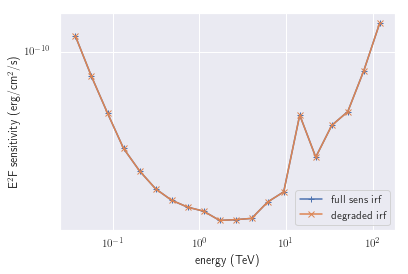

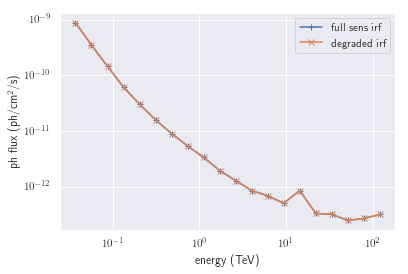

In [2]:
# ====================================
# !!! PLOT DEGRADE IRF SENSITIVITY !!!
# ====================================

import csv
import pandas as pd

from module_plot import *

savefig1 = outpath + 'sensitivity_differential.png'
savefig2 = outpath + 'sens_phflux_differential.png'

df1 = pd.read_csv(output[0])
df2 = pd.read_csv(output[1])
cols = list(df1.columns)
energy1 = np.array(df1[cols[0]])
energy2 = np.array(df2[cols[0]])
sens1 = np.array(df1[cols[6]])
sens2 = np.array(df2[cols[6]])

flux1 = np.array(df1[cols[4]])
flux2 = np.array(df2[cols[4]])

print(sens1.max(), sens2.max())

showSensitivity([10**energy1, 10**energy2], [sens1, sens2], savefig1, marker=['+', 'x'],
                xlabel='energy (TeV)', ylabel='E$^2$F sensitivity (erg/cm$^2$/s)', 
                label=['full sens irf', 'degraded irf'], fontsize=12)

showSensitivity([10**energy1, 10**energy2], [flux1, flux2], savefig2, marker=['+', 'x'],
                xlabel='energy (TeV)', ylabel='ph flux (ph/cm$^2$/s)', 
                label=['full sens irf', 'degraded irf'], fontsize=12)